In [ ]:
import csv
import pandas as pd
from konlpy.tag import Kkma
from collections import defaultdict
import string
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rc
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tsv_file = '테스트용_preprocessed.tsv'

data = []

with open(tsv_file, 'r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        data.append(row)

df = pd.DataFrame(data[1:], columns=data[0])
df

In [ ]:
all_nouns = []

kkma = Kkma()

for review in reviews:
    nouns = kkma.nouns(review)
    all_nouns.extend(nouns)


In [ ]:
custom_stop_words = ["강아지","구매","감사","생각","우리","아기","주문"]
tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(all_nouns)])


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_scores = tfidf_matrix.toarray()[0]
top_words_indices = tfidf_scores.argsort()[-10:][::-1]
top_words = [feature_names[idx] for idx in top_words_indices]

print("Top meaningful words:", top_words)

In [ ]:
#1000개 처리에 10초정도 소요됨
#kkma 가 좋은 점 : 예뻐요! -> 예쁘-어요! 로 바꿔주어서 훨씬 유용

reviews = df['review']

target_words = top_words

co_occurrence_matrix = defaultdict(lambda: defaultdict(int))

training_data = []

window_size = 2

for i in range(len(reviews)):
      reviews[i] = reviews[i].strip()
      words_and_tags = kkma.pos(reviews[i]) #pos 를 사용해야 tag까지 붙어서 처리됨

      filtered_words = [word for word, tag in words_and_tags
                        if tag in ['NNG', 'VV', 'MA', 'NNP', 'XR', 'VA']
                        and word not in reviews]

      x = [word.strip(string.punctuation) for word in filtered_words]
      x = [word for word in filtered_words if len(word) > 1]
      training_data.append(x)

for review in training_data:
    for i, word in enumerate(review):
        if word in target_words:
            start = max(0, i - window_size)
            end = min(len(review), i + window_size + 1)
            for j in range(start, end):
                if i != j and review[j] != word:
                    co_occurrence_matrix[word][review[j]] += 1
                    
for target_word in target_words:
    print(f"Words co-occurring with '{target_word}':")
    sorted_items = sorted(co_occurrence_matrix[target_word].items(), key=lambda x: x[1], reverse=True)
    for word, frequency in sorted_items:
        if frequency > 10:
            print(f"{word}: {frequency}")
    print()

C:\Users\kkksk\AppData\Local\Temp\ipykernel_6664\2979044751.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\kkksk\AppData\Local\Temp\ipykernel_6664\2979044751.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


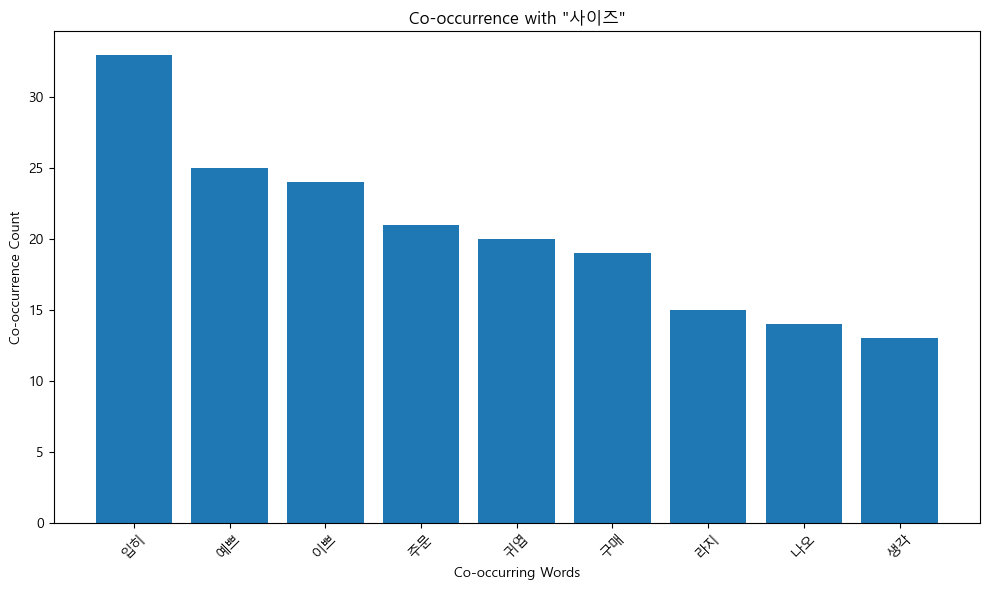

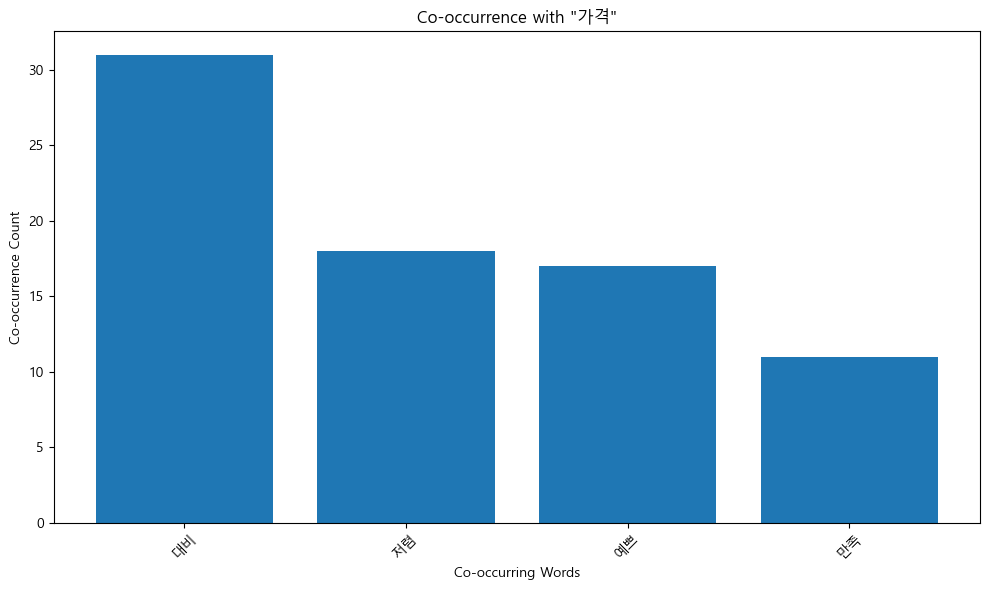

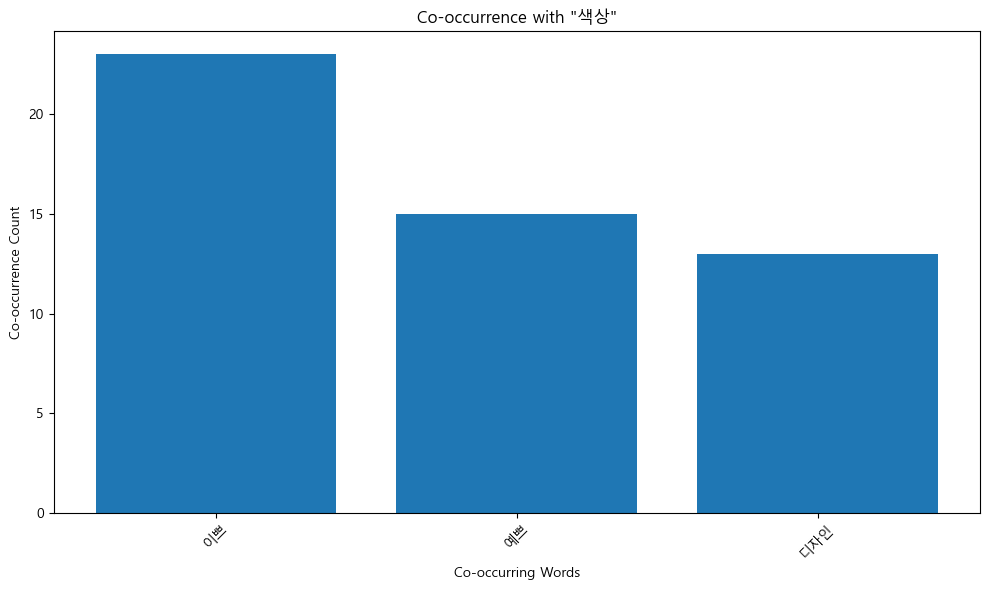

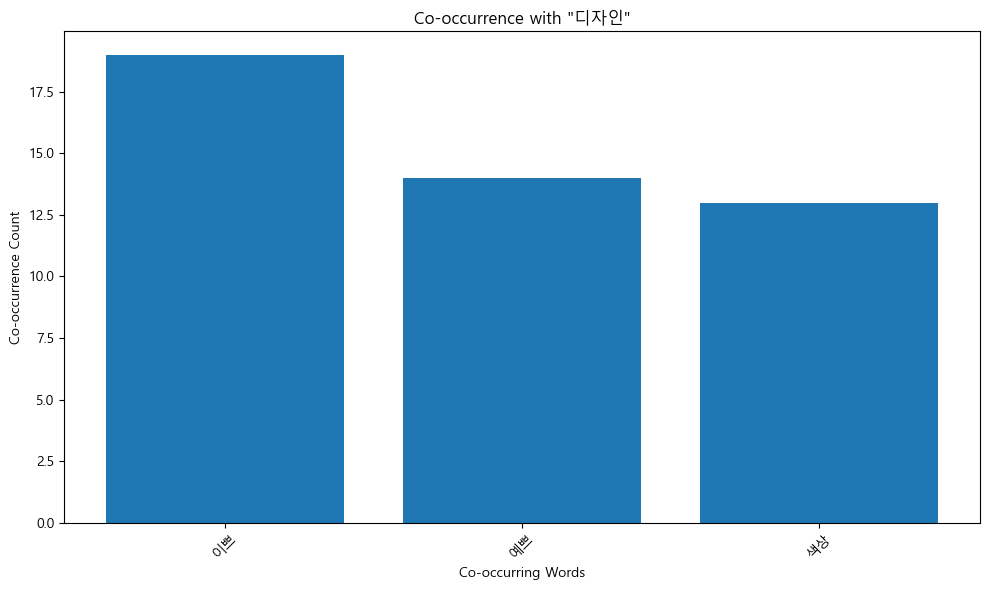

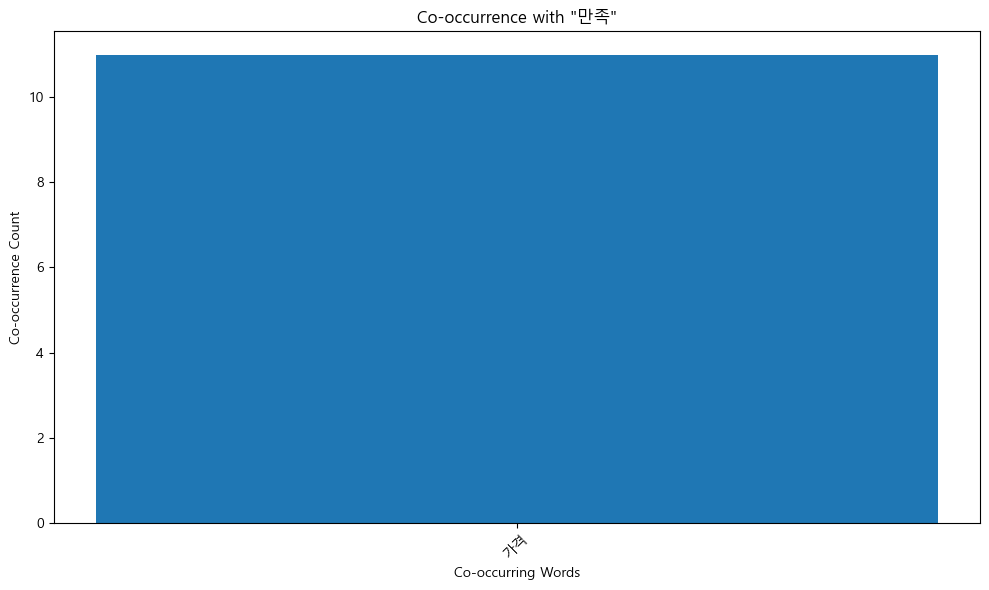

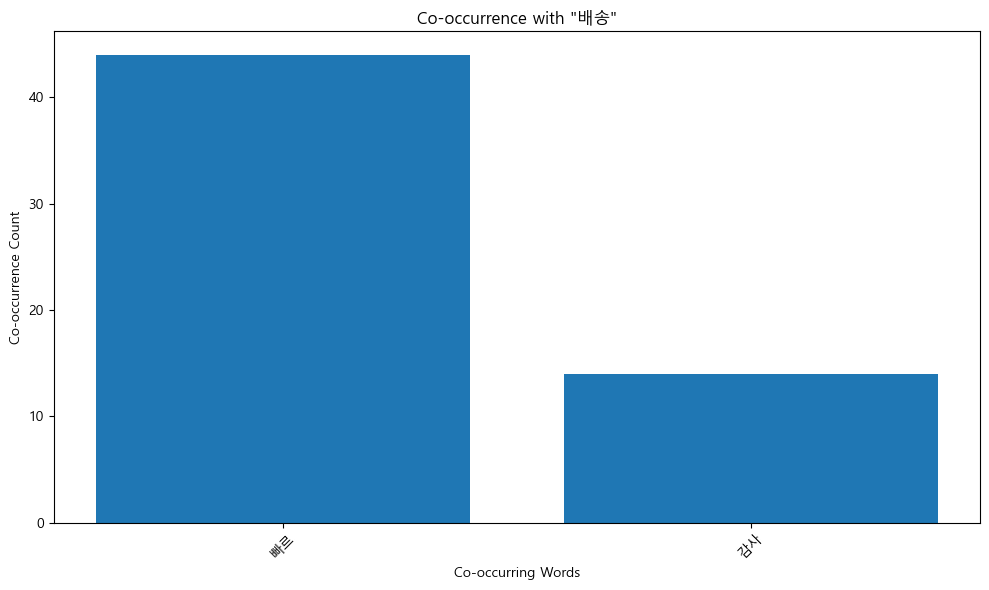

C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


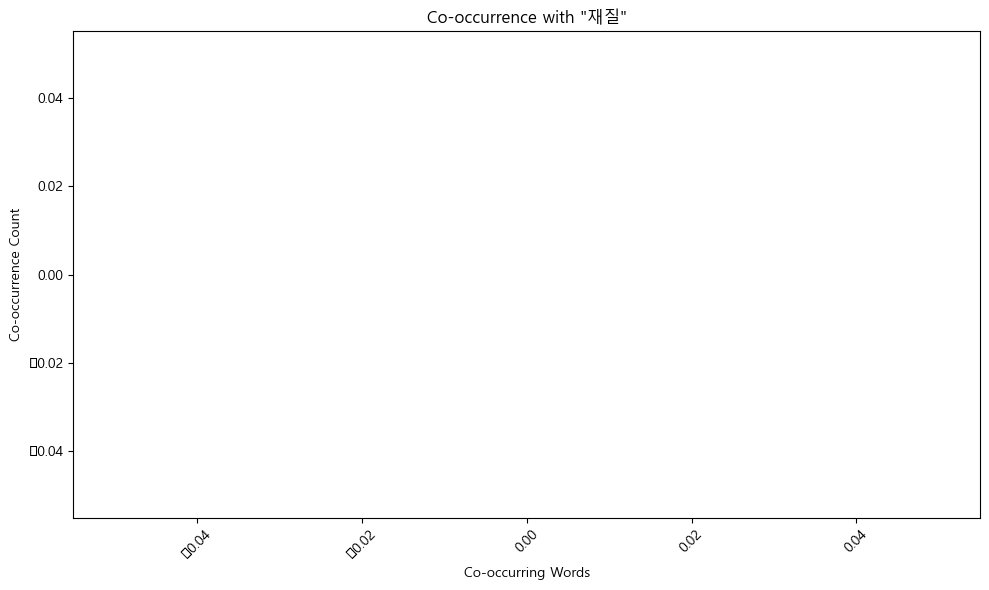

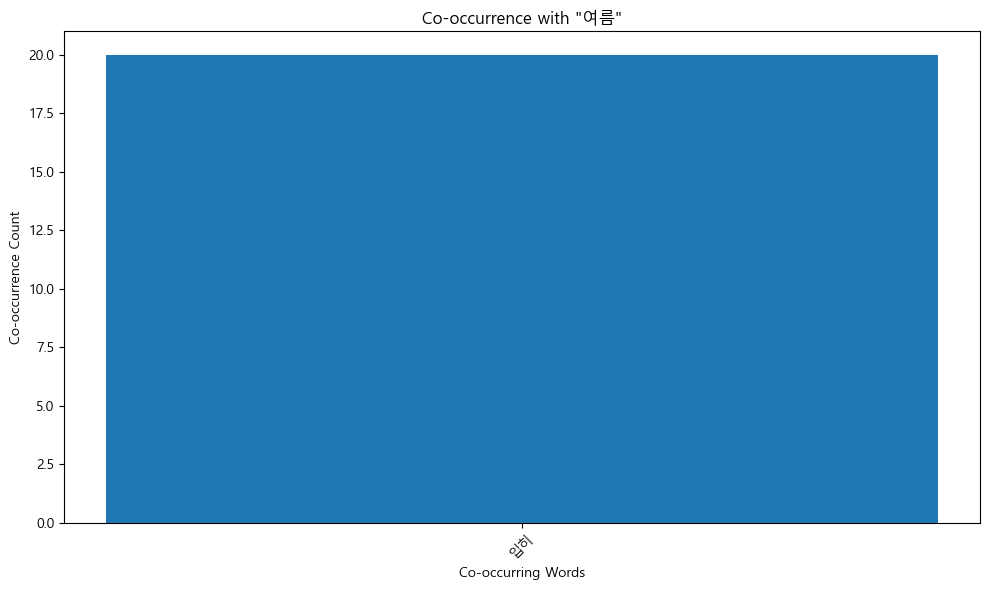

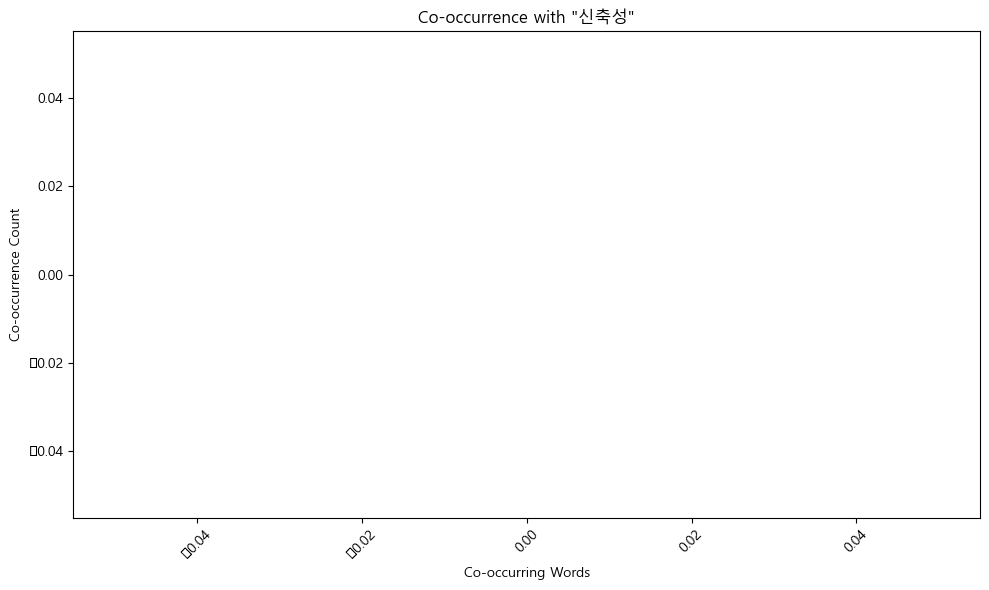

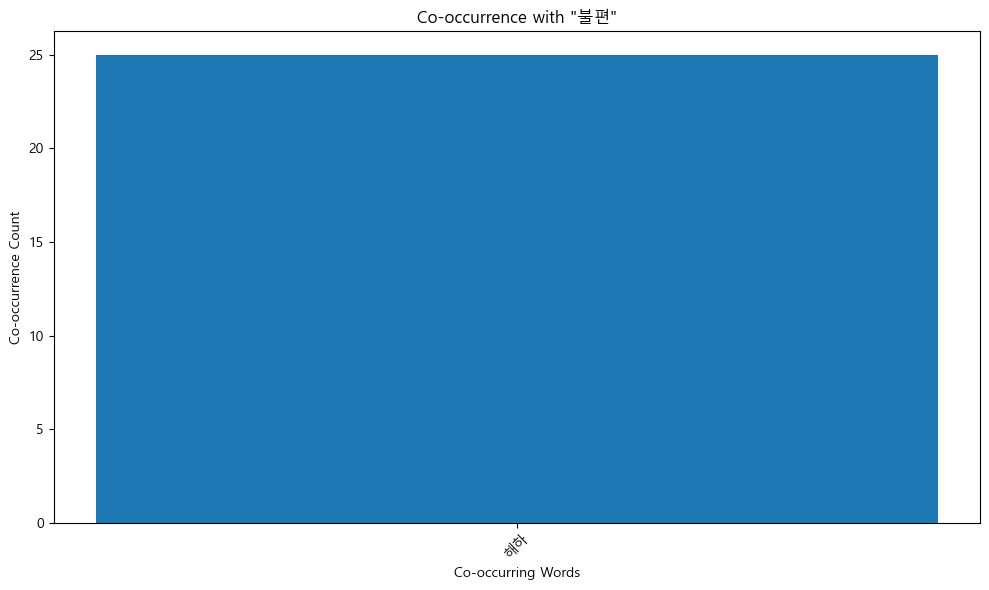

In [64]:
for target_word in target_words:
    sorted_items = sorted(co_occurrence_matrix[target_word].items(), key=lambda x: x[1], reverse=True)
    words = [word for word, frequency in sorted_items if frequency > 10]
    frequencies = [frequency for word, frequency in sorted_items if frequency > 10]

    
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    f_path = "C:/Users/kkksk/.matplotlib/NanumGothic.ttf"
    font_manager.FontProperties(fname=f_path).get_name()
    rc('font', family='Malgun Gothic')
    plt.xlabel('Co-occurring Words')
    plt.ylabel('Co-occurrence Count')
    plt.title(f'Co-occurrence with "{target_word}"')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()